# Thermophysical properties of brine (H$_2$0 - NaCl) #

Calculate the thermophysical properties of H$_2$0 - NaCl mixtures.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Density ##

Calculate the density of brine as a function of pressure, temperature and salt mole fraction.

Correlations from Drieser, *The system H$_2$0-NaCl. Part II: Correlations for molar volume, enthalpy, and isobaric heat capcacity from 0 to 1000C, 1 to 5000 bar, and 0 to 1 X$_{\mathrm{NaCl}}$*, Geochemica et Cosmochimica Acta 71, 4902-4919 (2007).

The specific volume of the H$_2$0-NaCl mixture is found from the specific volume of H$_2$0 with an effective temperature, $T_v = n_1 + n_2 T$.

The parameters $n_1$ and $n_2$ are defined as $n_1 = n_{10} + n_{11} (1-X_{\mathrm{NaCl}}) + n_{12} (1-X_{\mathrm{NaCl}})^2$, and $n_2 = n_{20} + n_{21} \sqrt{X_{\mathrm{NaCl}} + n_{22}} + n_{23} X_{\mathrm{NaCl}}$.

These parameters are given by Drieser (2007), and can be calculated as: (NOTE: the pressure is in bar)

In [12]:
def n11(p) :
    return -54.2958 - 45.7623 * np.exp(-9.44785e-4 * p)

def n21(p) :
    return -2.6142 - 0.000239092 * p

def n22(p) :
    return 0.0356828 + 4.37235e-6 * p + 2.0566e-9 * p * p

def n1x1(p) :
    return 330.47 + 0.942876 * np.sqrt(p) + 0.0817193 * p - 2.37556e-8 * p**2 + 3.45052e-10 * p**3

def n2x1(p) :
    return -0.0370751 + 0.00237723 * np.sqrt(p) + 5.42049e-5 * p + 5.84709e-9 * p**2 - 5.99373e-13 * p**3

def n12(p) :
    return -n1x1(p) - n11(p)

def n20(p) :
    return 1.0 - n21(p) * np.sqrt(n22(p))

def n23(p) :
    return n2x1(p) - n20(p) -  n21(p) * np.sqrt(1.0 + n22(p))


def n1(p, X) :
    return n1x1(p) + n11(p) * (1. - X) + n12(p) * (1.0 - X)**2

def n2(p, X) :
    return n20(p) + n21(p) * np.sqrt(X + n22(p)) + n23(p) * X

Plot of the parameters $n_1$ and $n_2$, which corresponds to Figure 4 in Drieser (2007).

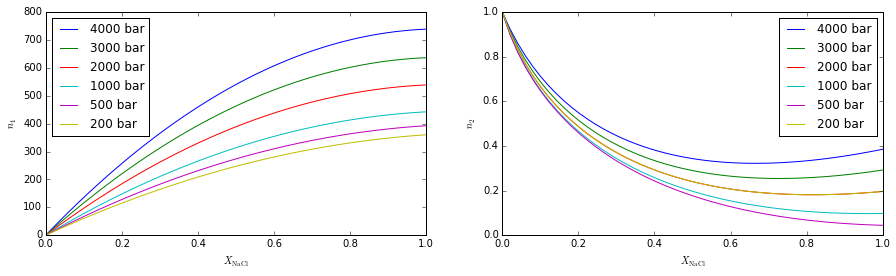

In [13]:
Xdata = np.linspace(0,1)

fig, axes = plt.subplots(1,2, figsize=(15,4))

axes[0].plot(Xdata, n1(4000,Xdata), label='4000 bar'); axes[1].plot(Xdata, n2(4000,Xdata), label='4000 bar');
axes[0].plot(Xdata, n1(3000,Xdata), label='3000 bar'); axes[1].plot(Xdata, n2(3000,Xdata), label='3000 bar');
axes[0].plot(Xdata, n1(2000,Xdata), label='2000 bar'); axes[1].plot(Xdata, n2(2000,Xdata), label='2000 bar');
axes[0].plot(Xdata, n1(1000,Xdata), label='1000 bar'); axes[1].plot(Xdata, n2(1000,Xdata), label='1000 bar');
axes[0].plot(Xdata, n1(500,Xdata), label='500 bar');  axes[1].plot(Xdata, n2(500,Xdata), label='500 bar');
axes[0].plot(Xdata, n1(200,Xdata), label='200 bar');  axes[1].plot(Xdata, n2(2000,Xdata), label='200 bar');
axes[0].set_xlabel('$X_{\mathrm{NaCl}}$'); axes[1].set_xlabel('$X_{\mathrm{NaCl}}$')
axes[0].set_ylabel('$n_1$'); axes[1].set_ylabel('$n_2$');
axes[0].legend(loc = 'upper left'); axes[1].legend()

The effective temperature is then

In [14]:
def Tv(p, t, X) :
    return n1(p, X) + n2(p, X) * t

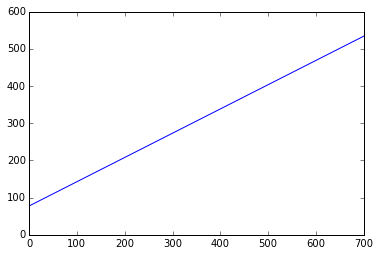

In [15]:
tdata = np.linspace(0,700)

plt.plot(tdata, Tv(1000, tdata, 0.1))

The above correlation can be used to get the molar volume of the brine. The brine density is then given by
\begin{equation}
\rho_b = \rho_{H_20} \frac{\sum_i x_i M_i}{M_{H_20}}
\end{equation}
where $x_i$ is the mass fraction of component $i$, and $M_i$ is the molar mass of component $i$, where $i$ refers to the salt or pure water components.

In [16]:
Mnacl = 58.443e-3
Mh2o = 18.015e-3

def Mbrine(X) :
    return X * Mnacl + (1.0 - X) * Mh2o

Converting from molality (mol/kg) to mass fraction (kg/kg)

In [17]:
def mol2mass(x) :
    return 1.0/(1. + 1./(x * Mnacl))

Density data from Pitzer et al, *Thermodynamic properties of aqueous sodium chloride solution*, Journal of Physical and Chemical Reference Data, 13, 1-102 (1984). (Density is in g/cm^3, multiply by 1000 to get kg/m^3).

The first data set is for P = 200bar, t = 50C, and molality as specified.

The second data set is for P = 400bar, t = 100C, and molality as specified.

In [51]:
moldata = np.array([0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])

rhodata_p200_t50 = np.array([1.00045, 1.00622, 1.01564, 1.02487, 1.0339, 1.06852, 1.10087, 1.13123, 1.15982, 1.18682])
rhodata_p400_t100 = np.array([0.98002, .98573, 0.99503, 1.00411, 1.01301, 1.04704, 1.07887, 1.10875, 1.13685, 1.16331])

Read in MOOSE data for comparison.

In [52]:
moosedata1 = pd.read_csv('gold/BrineProperty_density_vpp_0001.csv')
moosedata2 = pd.read_csv('gold/BrineProperty_density2_vpp_0001.csv')

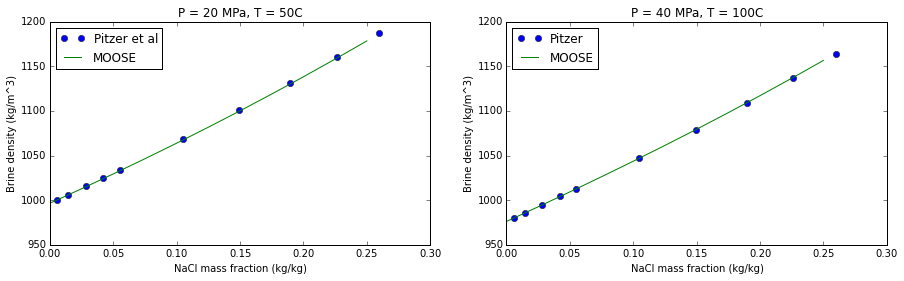

In [53]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

# P = 20Mpa, T = 50C
axes[0].plot(mol2mass(moldata), 1000*rhodata_p200_t50, 'o',label='Pitzer et al')
axes[0].plot(0.125*moosedata1.x, moosedata1.BrinePropertyAuxVariable, label='MOOSE')
axes[0].set_xlabel('NaCl mass fraction (kg/kg)')
axes[0].set_ylabel('Brine density (kg/m^3)')
axes[0].set_title('P = 20 MPa, T = 50C')
axes[0].legend(loc = 'upper left')

# P = 40Mpa, T = 100C
axes[1].plot(mol2mass(moldata), 1000*rhodata_p400_t100, 'o', label='Pitzer')
axes[1].plot(0.125*moosedata2.x, moosedata2.BrinePropertyAuxVariable, label='MOOSE')
axes[1].set_xlabel('NaCl mass fraction (kg/kg)')
axes[1].set_ylabel('Brine density (kg/m^3)')
axes[1].set_title('P = 40 MPa, T = 100C')
axes[1].legend(loc = 'upper left')

Conversion from mole fraction to mass fraction.

In [21]:
Mnacl = 58.443e-3
Mh2o = 18.015e-3

# Average molar mass using mole fraction
def MX(X) :
    return X * Mnacl + (1.0 - X) * Mh2o

# Average molar mass using mass fraction
def Mx(x) :
    return 1/(x/Mnacl + (1.0-x)/Mh2o)

# Function to convert mole fraction (X) to mass fraction (x)
def molf2massf(X) :
    return X * Mnacl /(X * Mnacl + (1.0-X)*Mh2o)

Check the functions return the same quantity.

In [22]:
print MX(0.1)
print Mx(molf2massf(0.1))

0.0220578
0.0220578


## Viscosity ##

Calculate the density of viscosity as a function of pressure, temperature and salt mole fraction.

Correlations from Phillips et al, *A technical databook for geothermal energy utilization*, LBL-12810 (1981).

NOTE: the correlation requires molal concentration (mol/kg).

Experimental data from Phillips et al, *Viscosity of NaCl and other solutions up to 350C and 50MPa pressures*, LBL-11586 (1980). Consider two cases: T = 50C and P = 10MPa, and T = 100C, P = 20MPa, for molal concentrations from 0 to 5 mol/kg. Viscosity is in cP (multiply by 1e-3 to get Pa.s). 

In [54]:
molconcdata = np.array([0.,1.,2.,3.,4.,5.])
expdata_t50_p10 = np.array([0.5460, 0.6081, 0.6777, 0.7593, 0.8545, 0.9642])
expdata_t100_p20 = np.array([0.2870, 0.3230, 0.3617, 0.4056, 0.4559, 0.5137])

The mass fraction corresponding to these molalities are

In [24]:
mol2mass(molconcdata)

array([ 0.        ,  0.05521601,  0.10465347,  0.1491744 ,  0.18947747,
        0.22613497])

In [55]:
def mass2mol(x) :
    return x / ((1.0 - x)*Mnacl)

Read in MOOSE data for comparison.

In [56]:
moosedata1 = pd.read_csv('gold/BrineProperty_viscosity1_vpp_0001.csv')
moosedata2 = pd.read_csv('gold/BrineProperty_viscosity2_vpp_0001.csv')

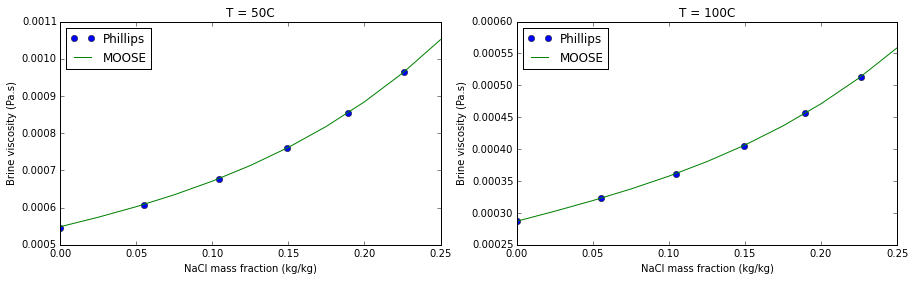

In [57]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

# T = 50C
axes[0].plot(mol2mass(molconcdata), 1.e-3*expdata_t50_p10, 'o',label='Phillips')
axes[0].plot(0.125*moosedata1.x, moosedata1.BrinePropertyAuxVariable, label='MOOSE')
axes[0].set_xlabel('NaCl mass fraction (kg/kg)')
axes[0].set_ylabel('Brine viscosity (Pa.s)')
axes[0].set_title('T = 50C')
axes[0].legend(loc = 'upper left')

# T = 100C
axes[1].plot(mol2mass(molconcdata), 1.e-3*expdata_t100_p20, 'o', label='Phillips')
axes[1].plot(0.125*moosedata2.x, moosedata2.BrinePropertyAuxVariable, label='MOOSE')
axes[1].set_xlabel('NaCl mass fraction (kg/kg)')
axes[1].set_ylabel('Brine viscosity (Pa.s)')
axes[1].set_title('T = 100C')
axes[1].legend(loc = 'upper left')

## Solubility ##

Halite solubility as a function of temperature.

Correlation originally from Potter et al., *A new method for determining the solubility of salts in aqueous solutions at elevated temperatures*, J. Res. U.S. Geol. Surv., 5, 389-395 (1977). Equation describing halite solubility is repeated in Chou, *Phase relations in the system NaCI-KCI-H20. III: Solubilities of halite in vapor-saturated liquids above 445°C and redetermination of phase equilibrium properties in the system NaCI-HzO to 1000°C and 1500 bars*, Geochimica et Cosmochimica Acta 51, 1965-1975 (1987).

It has been shown that this correlation underestimates that solubility at elevated temperatures (above approximately 450C - see Battistelli, *Improving the treatment of saline brines in EWASG for the simulation of hydrothermal systems*, Proceedings, TOUGH symposium 2012). Improved correlations (for example Driesner and Heinrich, *The system H$_2$O-NaCl. Part 1: Correlation formulae for phase relations in temperature-pressure-composition space from 0 to 1000C, 0 to 5000 bar, and 0 to 1 XNaCl*, Geochemica et Cosmochemica Acta 71, 4902-4919 (2007).) are more complicated, with little improvement in accuracy at pressures and temperatures of interest in simulations of typical reservoirs. As a result, the simple correlation from Potter is used.

NOTE: the correlation requires molal concentration (mol/kg).

Experimental data from Bodnar et al, *Synthetic fluid inclusions in natural quartz, III. Determination of phase equilibrium properties in the system H$_2$O-NaCl to 1000C and 1500 bars*, Geocehmica et Cosmochemica Acta, 49, 1861-1873 (1985) and re-interpreted in Chou (1987). Note that the solubility is in %, and that the average of the range quoted has been used for each point.

In [58]:
expsol_data = np.array([[273, 35.65],[386.5, 44.2],[434, 48.65], [476,52.95], [504.5, 56.0], [545.5, 60.85], 
                        [589, 66.3], [602, 68], [630, 71.85], [660, 76.15]])

Read in the MOOSE solubility test data.

In [59]:
moosedata = pd.read_csv('gold/BrineProperty_solubility_vpp_0001.csv')

Plot the experimental data against the MOOSE results.

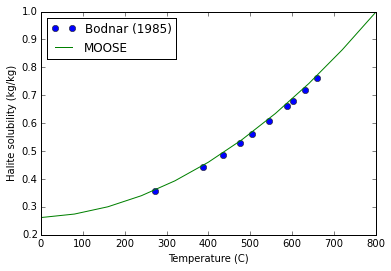

In [60]:
plt.plot(expsol_data[:,0], expsol_data[:,1]/100.,'o', label='Bodnar (1985)')
plt.plot(400.* moosedata.x, moosedata.BrinePropertyAuxVariable, label='MOOSE')
plt.legend(loc = 'upper left')
plt.xlabel('Temperature (C)')
plt.ylabel('Halite solubility (kg/kg)')

## Brine vapour pressure ##

The vapour pressure of brine as a function of temperature and NaCl mass fraction. Correlations from Haas, *Physical properties of the coexisting phases and thermochemical properties of the H20 component in boiling NaCl solutions*, Geological Survey Bulletin, 1421-A (1976).

Experimental data from Liu and Lindsay, *Thermodynamics of sodium chloride solutions at high temperatures*, Journal of Solution Chemistry, 1, 45-69 (1972). 

Note that brine vapour pressure is given in torr (multiply by 101,325/760. to convert to Pa), and molal concentration (mol/kg) is used. Experimental data for T = 200C.

In [66]:
expvp_data = np.array([[3.886, 11644.93 - 1607.7],[5.055, 11644.93 - 2111.8],[6.24, 11644.93 - 2599.7],[6.396, 11644.93 - 2662.6],
                       [7.417, 11644.93 - 3063.8],[7.757, 11644.93 - 3185.3],[7.973, 11644.93 - 3272.6]])

Read in the MOOSE vapour pressure test data.

In [75]:
moosedata = pd.read_csv('gold/BrineProperty_psat_vpp_0001.csv')

Plot the experimental data against the MOOSE results.

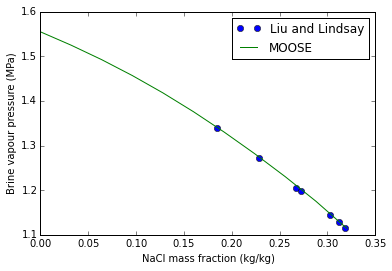

In [77]:
plt.plot(mol2mass(expvp_data[:,0]),(101325. / 760.) * expvp_data[:,1] *1.e-6,'o', label='Liu and Lindsay')
plt.plot(0.16*moosedata.x, moosedata.BrinePropertyAuxVariable*1.e-6, label='MOOSE')
plt.xlabel('NaCl mass fraction (kg/kg)')
plt.ylabel('Brine vapour pressure (MPa)')
plt.legend(loc = 'upper right')

## Halite density ##

Density of solid NaCl (Halite). From Driesner, *The system H2o-NaCl. Part II: Correlations for molar volume, enthalpy, and isobaric heat capacity from 0 to 1000 C, 1 to 500 bar, and 0 to 1 Xnacl*, Geochimica et Cosmochimica Acta 71, 4902-4919 (2007).

Experimental data from Brown, *The NaCl pressure standard*, Journal of Applied Physics, 86, 5801-5808 (1999). Example data for T = 400 K (126.85 C). Note that data is given as  pressure (GPa), volume at 0K (cc/gm), and volume compression $(V-V_0)/V_0$ - invert and multiply by 1000 to get kg/m^3. 

In [25]:
exphdens_data = np.array([[23.91, 0.3143, 0.3197],[22.34,0.3188, 0.31],[20.85,0.3233, 0.3002],[19.45,0.3279, 0.2903],[18.12,0.3324, 0.2805],[16.86,0.3369, 0.2708],
                          [15.67,0.3414, 0.261],[14.55,0.346, 0.2511],[13.5,0.3505, 0.2413],[12.5,0.3550, 0.2316],[11.56,0.3595, 0.2219],[10.68,0.3641, 0.2119],
                          [9.85,0.3686, 0.2022],[9.06,0.3731, 0.1924],[8.32,0.3776, 0.1827],[7.63,0.3822, 0.1727],[6.97,0.3867, 0.163],[6.35,0.3912, 0.1532]])

Read in the MOOSE vapour pressure test data.

In [22]:
moosedata = pd.read_csv('gold/BrineProperty_halite_density_vpp_0001.csv')

Plot the experimental data against the MOOSE results.

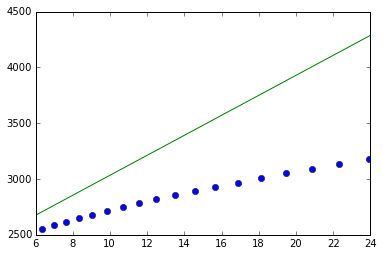

In [42]:
plt.plot(exphdens_data[:,0], 1000./(exphdens_data[:,1]),'o')
plt.plot((6. + 9.*moosedata.x),moosedata.BrinePropertyAuxVariable)

In [132]:
def d(p, t) :
    pbar = p*1.e-5
    d0=(2.17043e3 - 2.4599e-1 * t - 9.5797e-5 * t *t)
    return d0  + (5.727e-3 + 2.715e-3*np.exp(t/733.4)) * pbar

In [142]:
def d2(p, t) :
    return 2165.* np.exp(-1.2E-4*t+4.0E-11*p)

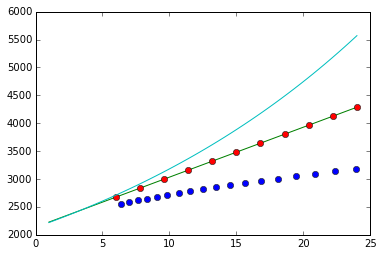

In [151]:
plt.plot(exphdens_data[:,0], 1000./exphdens_data[:,1],'o')
plt.plot(np.linspace(1,24), d(np.linspace(1,24)*1e9,400-273.15))
plt.plot((6. + 9.*moosedata.x),moosedata.BrinePropertyAuxVariable,'o')
plt.plot(np.linspace(1,24), d2(np.linspace(1,24)*1e9,400-273.15))